<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0523_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리] 및 [필사]

## 파이썬 머신러닝 완벽가이드 ch9 추천 시스템

### 9.8 파이썬 추천 시스템 패키지 - Surprise

#### Surprise 패키지 소개

파이썬 기반에서 사이킷런과 유사한 API와 프레임워크 제공

<장점>
- 다양한 추천 알고리즘(사용자/아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링) 적용 가능
- 사이킷런의 핵심 API와 유사함 (`fit(), predict(), train_test_split(), cross_validate(), GridSearchCV` 등)

In [2]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633742 sha256=44c75445702b2fbe03b5b9c0220af8f356b6a60bd1c1fea2cab3510aa95f3fa4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


#### Surprise를 이용한 추천 시스템 구축

[링크 텍스트](https://surprise.readthedocs.io/en/stable/) 문서 참고

In [4]:
from surprise import SVD
from surprise import Dataset #데이터 로딩
from surprise import accuracy 
from surprise.model_selection import train_test_split

Surprise의 Movie Lens 데이터 세트의 형식


```
userId | movieId | rating
```



In [5]:
data = Dataset.load_builtin('ml-100k') #100만개 데이터는 'ml-1m'
trainset, testset = train_test_split(data, test_size=.25, random_state=0) #분리문자 \t

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [6]:
algo = SVD() #잠재 요인 협업 필터링
algo.fit(trainset) 

<Surprise에서 추천을 예측하는 메서드>

- `test()`: 사용자-아이템 평점 데이터 세트 전체(입력된 데이터 세트)에 대한 추천 데이터 추천 세트
- `prdict()`: 개별 사용자와 영화에 대한 추천 평점 반환



In [7]:
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.731962158235922, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.7165674034465352, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.8672262547881795, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.538126050069443, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.4536372405140074, details={'was_impossible': False})]

> uid: 개별사용자 아이디, iid: 영화 아이디, r_ui: 실제 평점, est: 추천 예측 평점, details의 'was_impossible': 추천 예측 불가능여부


In [8]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ] #객체명.uid 형식으로 속성 추출 

[('120', '282', 3.731962158235922),
 ('882', '291', 3.7165674034465352),
 ('535', '507', 3.8672262547881795)]

In [9]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid) #개별 사용자 아이디, 아이템 아이디를 인수로
print(pred)

user: 196        item: 302        r_ui = None   est = 4.17   {'was_impossible': False}


In [10]:
accuracy.rmse(predictions)

RMSE: 0.9466


0.9466000541814704

#### Surprise 주요 모듈 소개

**Dataset**

: 사용자 아이디, 아이템 아이디, 평점 순으로 된 데이터 세트이어야 함

- `Dataset.load_builtin(name='ml-100k')`: 무비렌즈 아카이브 FTP 서버에서 무비렌즈 데이터 다운로드
- `Dataset.load_from_file(file_path, reader)`: OS 파일에서 데이터 로딩
- `Dataset.load_from_df(df, reader)`: 판다스의 DataFrame에서 데이터 로딩


**OS 파일 데이터를 Surprise 데이터 세트로 로딩**

In [11]:
import pandas as pd

ratings = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [13]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings_noh.csv',reader=reader)

<다른 OS 파일 사용 위한 Reader 클래스 생성>
- line_format(string): 칼럼 나열, 입력된 문자열을 공백으로 분리
- sep(char): 칼럼을 분리하는 분리자, 기본값 '\t', pd 기입 필요 x
- rating_scale(Tuple, optional): 평점 값의 최소~최대 

In [14]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정 
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**판다스 DataFrame에서 Surprise 데이터 세트로 로딩**



In [16]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

#### Surprise 추천 알고리즘 클래스

- SVD: 행렬 분해를 통한 잠재 요인 협업 필터링
  - n_factors
  - n_epochs
  - biased
- KNNBasic: 최근접 이웃 협업 필터링
- BaaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인

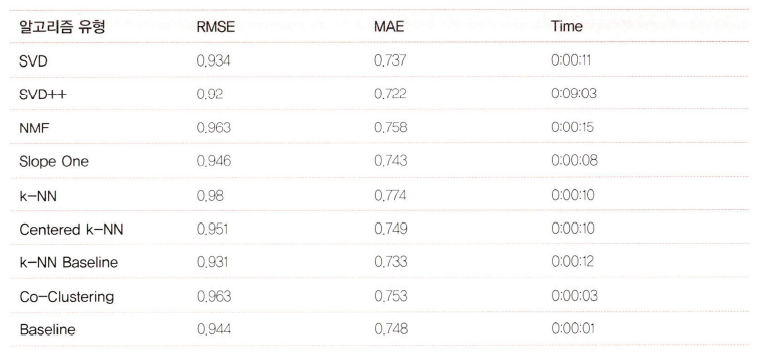

#### 베이스라인 평점

: 개인의 성형을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것

- 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
- 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
- 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

> 베이스라인 평점 = 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수

#### 교차 겁증과 하이퍼 파라미터 튜닝

In [18]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8728  0.8790  0.8711  0.8720  0.8698  0.8729  0.0032  
MAE (testset)     0.6683  0.6745  0.6705  0.6734  0.6667  0.6707  0.0029  
Fit time          6.07    5.20    5.38    5.25    5.19    5.42    0.33    
Test time         0.23    0.27    0.14    0.30    0.14    0.22    0.06    


{'fit_time': (6.071712970733643,
  5.195586919784546,
  5.3834779262542725,
  5.246664524078369,
  5.188290357589722),
 'test_mae': array([0.66829727, 0.67447761, 0.67047869, 0.67340795, 0.66672347]),
 'test_rmse': array([0.87279538, 0.87896795, 0.87107954, 0.87199536, 0.86981081]),
 'test_time': (0.23177814483642578,
  0.26706433296203613,
  0.1377556324005127,
  0.2962219715118408,
  0.14241242408752441)}

In [19]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8760496086853006
{'n_epochs': 20, 'n_factors': 50}


#### Surprise를 이용한 개인화 영화 추천 시스템 구축

In [20]:
# 아래 코드는 train_test_split( )으로 분리되지 않는 Dataset에 fit( )을 호출하여 오류를 발생합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

In [21]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

In [22]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [23]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/ml-latest-small/movies.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [24]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [25]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [26]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
